# Preprocessing for simulation 5

## Effects at phylum level and order level with Mis-specified tree information

#### Method comparison based on MSE and Pearson correlation coefficient 
#### for outcome associated taxa clustering at phylum & order level under regression design when using a mis-specified phylogenetic tree in model learning

@ Aug. 16, Youngwon (youngwon08@gmail.com)

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import softmax as softmax
from scipy.special import expit as sigmoid
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/simulation/s5"
path_genus = "./data/genus48"

def relu(x): 
    x[x <= 0.] = 0.
    return x

## Mis-specified Phylogenetic Tree information

In [3]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic_misspecify.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
phylogenetic_tree_info = phylogenetic_tree_info.iloc[:,::-1]
tree_level_list = phylogenetic_tree_info.columns.tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Bacilli,Firmicutes
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria


In [4]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 22
 Class: 16
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Phylum', 'Class', 'Genus', 'Order', 'Number', 'Family']
------------------------------------------------------------------------------------------


In [5]:
phylogenetic_tree = phylogenetic_tree_info
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  0,  0],
       [ 8,  8,  6,  5,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  6,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  0,  0],
       [17, 16,  1,  1,  1],
       [18, 17,  9,  7,  4],
       [19,  4,  4,  4,  2],
       [20, 18, 10,  8,  0],
       [21, 15,  5,  0,  0],
       [22, 19, 11,  9,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  0,  0],
       [25, 15,  5,  0,  0],
       [26, 22, 12,  6,  4],
       [27, 23,  6,  5,  3],
       [28, 24, 13, 10,  6],
       [29, 25, 14, 11,  4],
       [30, 26, 15, 11,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 16, 12,  4],
       [34, 29

In [6]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)
    pd.DataFrame(tree_weight_noise_list[-1]).to_csv('%s/miss_mw%d.csv' % (path, i+1), index=False)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


## True Phylogenetic Tree information

In [7]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
tree_level_list = phylogenetic_tree_info.columns[:-1].tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


In [8]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 23
 Class: 17
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Phylum', 'Class', 'Genus', 'Order', 'Number', 'Family']
------------------------------------------------------------------------------------------


In [9]:
phylogenetic_tree = phylogenetic_tree_info.iloc[:,:-1]
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  5,  0],
       [ 8,  8,  6,  6,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  7,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  5,  0],
       [17, 16,  9,  1,  1],
       [18, 17, 10,  8,  4],
       [19,  4,  3,  3,  2],
       [20, 18, 11,  9,  0],
       [21, 15,  5,  5,  0],
       [22, 19, 12, 10,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  5,  0],
       [25, 15,  5,  5,  0],
       [26, 22, 13,  7,  4],
       [27, 23,  6,  6,  3],
       [28, 24, 14, 11,  6],
       [29, 25, 15, 12,  4],
       [30, 26, 16, 12,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 17, 13,  4],
       [34, 29

In [10]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)
    pd.DataFrame(tree_weight_noise_list[-1]).to_csv('%s/mw%d.csv' % (path, i+1), index=False)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


# Regression effected with order level and phylum level selections

Aug. 10, 2019

## Experiments with 1000 replications

## Generating X: microbiome abundance data
* Using the data that Jing made, described in detail by Zhai et al. (2018a,b).
    * $n \times p$ OTU count matrix
    * Aggregating $p_0=2964$ OTUs to $p=48$ genus
* Sample size for each replication: $n = 1000$
    * Training $75%$; Test $25%$

* Phylogenetic tree levels:
    1. Genus: $m^0 = 48$
    1. Family: $m^1 = 40$
    1. Order: $m^2 = 23$
    1. Class: $m^3 = 17$
    1. Phylum: $m^4 = 9$

## Generation Y: a forward propagation approach

###  Ver 0: same weights with same true connection for each repeatition

#### (similar to the original version)

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition, 

* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

* Construct the true weights. 
    1. For $i = 1,2,...,4$, $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-4.5,3) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$

#### For each repeatition, 

* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer:
    1. $y=x^{5} = w^{5}x^{4}+b^{5} + \epsilon$ where $\epsilon \sim \mathcal{N}(0, 1)$

In [11]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
np.random.seed(10)
print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
order_idx = np.array([5,4,1,9]) # 5(0) and 4(2) are effect at order level, 1(1) and 9(1) are effects at phylum level
phylum_idx = np.array([1,0,2]) # 1(1, 9) are effect at phylum level, 1(6) and 3(5) are effects at order level

true_tree_idx_list = []
for i in range(5):
    idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
#     idx_class = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,3]==k] for k in class_idx]))
    idx_phylum = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
    idx = np.intersect1d(idx_order, idx_phylum)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver0/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver0/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')

yweight_list = []
ybias_list = []
for i in range(len(true_tree_weight_list)):
    yw = np.random.uniform(-4.5,3., true_tree_weight_list[i].shape).astype(np.float32) * true_tree_weight_list[i] # left only the weights on the true connections to the disease
    yb = np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32)
    yw = np.repeat([yw], x_list.shape[0], axis=0)
    yb = np.repeat([yb], x_list.shape[0], axis=0)
    yweight_list.append(yw)
    ybias_list.append(yb)
    np.save('%s/ver0/solw_%d.npy'%(path,i), yw)
    np.save('%s/ver0/solb_%d.npy'%(path,i), yb)
    
ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
ywc[:3,0] = np.random.uniform(-4.5,3., 3).astype(np.float32)
# ywc = np.expand_dims(np.array([-0.025, 0.15, -0.35, 0, 0, 0, 0, 0, 0]), axis=-1)
ywc[:,0] = ywc[:,0] * (np.sum(true_tree_weight_list[-1], axis=0) > 0).astype(np.float32)
ywc = np.repeat([ywc], x_list.shape[0], axis=0)
ybc = np.random.normal(0,4, ywc.shape[-1]).astype(np.float32)
ybc = np.repeat([ybc], x_list.shape[0], axis=0)
np.save('%s/ver0/solw_%d.npy'%(path,len(true_tree_weight_list)), ywc)
# np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    h = np.array(x, dtype=np.float32)
    for i, (yw, yb) in enumerate(zip(yweight_list,ybias_list)):
        yw_noise = yw[fold]
#         yw_noise += np.random.normal(0,0.0001, true_tree_weight_list[i].shape) \
#                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
        h = relu(np.dot(h, yw_noise) + np.repeat([yb[fold]], h.shape[0], axis=0))
    h = np.dot(h, ywc[fold])
    p = h + np.repeat([ybc[fold]], h.shape[0], axis=0)
    p += np.random.normal(0,1)
    newy = p[:,0]
    newy_all.append(newy)
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver0/y.csv'%path, index=False)
np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 1  3  5  6  7  9 11 16 17 21 24 25 32 37 38 41 44 46 47]
Family idx: [ 1  3  5  6  7  9 11 15 16 21 27 32 34 38 39]
 Order idx: [1 4 5 9]
 Class idx: [1 4 5]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s5/ver0/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s5/ver0/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s5/ver0/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./data/simulation/s5/ver0/tw_4.npy
-------------------------------------------------------

/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
newy_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-34.975567,-39.331127,-41.465370,-40.509079,-38.736015,-38.311619,-38.557915,-37.065807,-39.732494,-38.279469,...,-40.490810,-39.419727,-31.880260,-39.077190,-39.187725,-36.490715,-42.869270,-37.517899,-39.933151,-38.509125
1,-35.050320,-39.455643,-37.371708,-39.947388,-31.981976,-38.987991,-37.976120,-39.578407,-39.269058,-38.300503,...,-39.093079,-41.708168,-30.981966,-38.296654,-37.649876,-39.142921,-40.871735,-37.400768,-40.169647,-41.396313
2,-38.649723,-37.628792,-36.875454,-42.505695,-39.225182,-39.554928,-37.699825,-41.610523,-28.888489,-38.296768,...,-40.925682,-40.863529,-43.406898,-33.839542,-35.909168,-39.328934,-41.919556,-39.927620,-39.538532,-39.216320
3,-37.686405,-38.533806,-38.102352,-40.990364,-39.699318,-38.537861,-37.801289,-38.896778,-39.346077,-38.324970,...,-41.972385,-37.819736,-39.735680,-38.758175,-39.449024,-39.205360,-37.524147,-38.557774,-40.332603,-38.847065
4,-36.482452,-40.638065,-38.085831,-40.273006,-37.473930,-37.155910,-37.074677,-39.569477,-39.670860,-37.756115,...,-40.812210,-40.387165,-42.179863,-39.483501,-39.442368,-39.654125,-40.704948,-38.952030,-40.123108,-37.958027
5,-43.838753,-39.323818,-38.088634,-40.738899,-39.825340,-38.429905,-38.773167,-39.088997,-39.281906,-38.791946,...,-40.771919,-41.087345,-38.598236,-38.049141,-39.729965,-39.505779,-41.125477,-38.473145,-46.023544,-39.912701
6,-34.328846,-39.616703,-38.710995,-46.988159,-40.510281,-38.502380,-38.035957,-38.789806,-39.529137,-37.790905,...,-38.892506,-39.547066,-36.902866,-41.339516,-39.346554,-39.450203,-42.879959,-39.504013,-40.546242,-39.527962
7,-37.222885,-39.912979,-38.193748,-42.544388,-39.856796,-37.648228,-38.712231,-39.117630,-39.627922,-38.119656,...,-42.151386,-38.931198,-42.868889,-39.472927,-39.313583,-38.973736,-39.916592,-39.563049,-34.514690,-39.131222
8,-36.738754,-41.687042,-38.790836,-39.803417,-39.627789,-37.917725,-37.794518,-35.578663,-36.982216,-37.512390,...,-38.314545,-36.018894,-38.579620,-39.436699,-39.145222,-41.111759,-41.550526,-41.432358,-39.905254,-38.378372
9,-37.302132,-42.668854,-34.851257,-40.397438,-36.246277,-39.052670,-42.198734,-37.720043,-40.618660,-38.269428,...,-43.904778,-40.155945,-36.151226,-39.522751,-39.697395,-34.620823,-40.821941,-38.503071,-39.665966,-38.662556


(array([6.10000e+02, 4.41700e+03, 3.25670e+04, 6.49495e+05, 2.82762e+05,
        2.38220e+04, 4.75300e+03, 1.38400e+03, 1.76000e+02, 1.40000e+01]),
 array([-56.00531769, -51.56070547, -47.11609325, -42.67148104,
        -38.22686882, -33.7822566 , -29.33764439, -24.89303217,
        -20.44841995, -16.00380774, -11.55919552]),
 <a list of 10 Patch objects>)

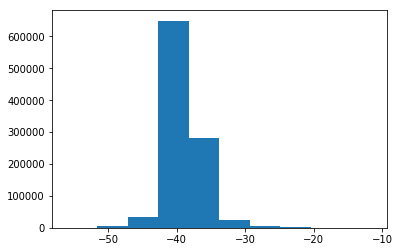

In [13]:
plt.hist(np.array(newy_all).flatten())